<a href="https://colab.research.google.com/github/ahsan-javed-ds/house-price-prediction-fastapi/blob/main/house_price_prediction_fastapi_ahsan_javed_ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implementation of Diferent ML Models -- Housing Price Prediction with FastAPI implementation**

**Machine Learning Models used in this notebook are:**

1. `Linear Regression Model`
2. `Random Forest Regressor`
3. `Gradient Boosting Regressor`
4. `K-Nearest Neighbors Regressor`
5. `Support Vector Regressor (SVR)`



**Author of this notebook:** Ahsan Javed

**Email:** ahsan.javed1702@gmail.com

**GitHub:** https://github.com/ahsan-javed-ds

**LinkedIn:** https://www.linkedin.com/in/ahsan-javed17/

# **Dataset Information**

This dataset `housing.csv` has been downloaded from Kaggle.

## Dataset details:

1. `price`: The target variable, representing the price of the house.

2. `area`: The area of the house.

3. `bedrooms`: The number of bedrooms.

4. `bathrooms`: The number of bathrooms.

5. `stories`: The number of stories.

6. `mainroad`: A categorical feature indicating whether the house is on a main road (likely 'yes' or 'no').

7. `guestroom`: A categorical feature indicating whether there is a guest room (likely 'yes' or 'no').

8. `basement`: A categorical feature indicating whether there is a basement (likely 'yes' or 'no').

9. `hotwaterheating`: A categorical feature indicating whether there is hot water heating (likely 'yes' or 'no').

10. `airconditioning`: A categorical feature indicating whether there is air conditioning (likely 'yes' or 'no').

11. `parking`: Shows the number of parking spaces.

12. `prefarea`: Shows whether the house is in a preferred area (yes/no).

13. `furnishingstatus`: Shows the furnishing status (furnished/semi-furnished/unfurnished).

# **Importing and Downloading the dependencies**

In [1]:
!pip install fastapi uvicorn nest-asyncio pyngrok pandas scikit-learn joblib matplotlib seaborn
!apt-get install nodejs npm -y
!npm install -g localtunnel

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  gyp javascript-common libc-ares2 libjs-events libjs-highlight.js
  libjs-inherits libjs-is-typedarray libjs-psl libjs-source-map
  libjs-sprintf-js libjs-typedarray-to-buffer libnode-dev libnode72
  libnotify-bin libnotify4 libuv1-dev node-abab node-abbrev node-agent-base
  node-ansi-regex node-ansi-styles node-ansistyles node-aproba node-archy
  node-are-we-there-yet node-argparse node-arrify node-asap node-asynckit
  node-balanced-match node-brace-expansion node-builtins node-cacache
  node-chalk node-chownr node-clean-yaml-object node-cli-table node-clone
  node-color-convert node-color-name node-colors node-columnify
  node-combined-stream node-commander node-console-control-strings
  node-copy-concurrently node-core-util-is node-coveralls node-cssom
  node-cssstyle node-debug node-decompress-response node-defaults
  node-delayed-st

In [2]:
from IPython import get_ipython
from IPython.display import display
from google.colab import drive

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib # Use joblib consistently for loading/saving models
import requests # For testing the API

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

import threading
import uvicorn
from fastapi import FastAPI, HTTPException # Include HTTPException if you use it for error handling
from fastapi.responses import FileResponse
from pydantic import BaseModel
import nest_asyncio
import subprocess

## **Mounting the Google Drive (Optional)**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1. Data Loading**

In [4]:
import pandas as pd

# Load dataset from Google Drive
df = pd.read_csv('/content/drive/MyDrive/House_Price_predicition/Housing.csv')

# Display first 5 rows
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# **2. Exploratory Data Analysis (EDA)**

## **Descriptive Analysis:**
Summarising the dataset distribution, central tendencies, and dispersion.

In [5]:
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (545, 13)


In [6]:
print("\nData Types:\n", df.dtypes)


Data Types:
 price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [7]:
print("\nDescriptive Statistics:\n", df.describe())


Descriptive Statistics:
               price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [9]:
# Analyzing the distribution of categorical features
categorical_features = df.select_dtypes(include=['object']).columns
for col in categorical_features:
    print(f'\nDistribution of {col}:\n{df[col].value_counts()}\n================================')


Distribution of mainroad:
mainroad
yes    468
no      77
Name: count, dtype: int64

Distribution of guestroom:
guestroom
no     448
yes     97
Name: count, dtype: int64

Distribution of basement:
basement
no     354
yes    191
Name: count, dtype: int64

Distribution of hotwaterheating:
hotwaterheating
no     520
yes     25
Name: count, dtype: int64

Distribution of airconditioning:
airconditioning
no     373
yes    172
Name: count, dtype: int64

Distribution of prefarea:
prefarea
no     417
yes    128
Name: count, dtype: int64

Distribution of furnishingstatus:
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


## **Correlation Analysis**:
Understanding the relationship between multiple `numerical_variables`.

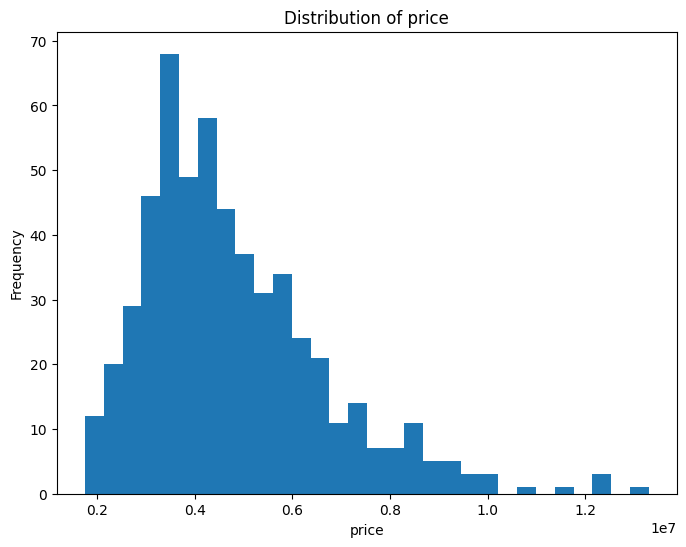

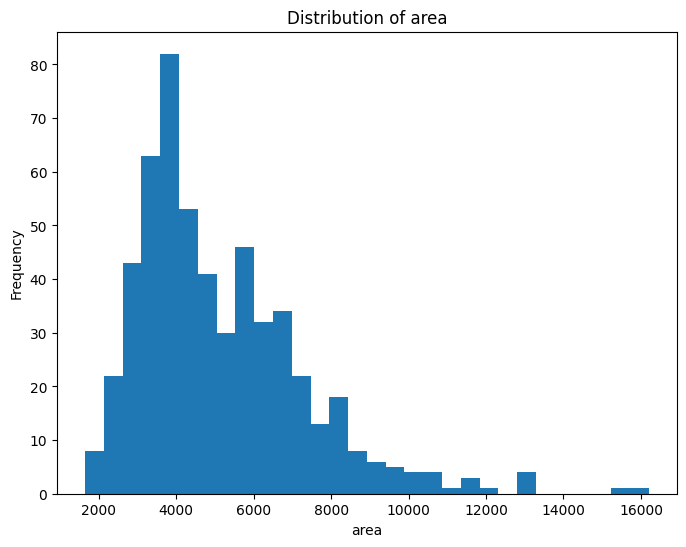

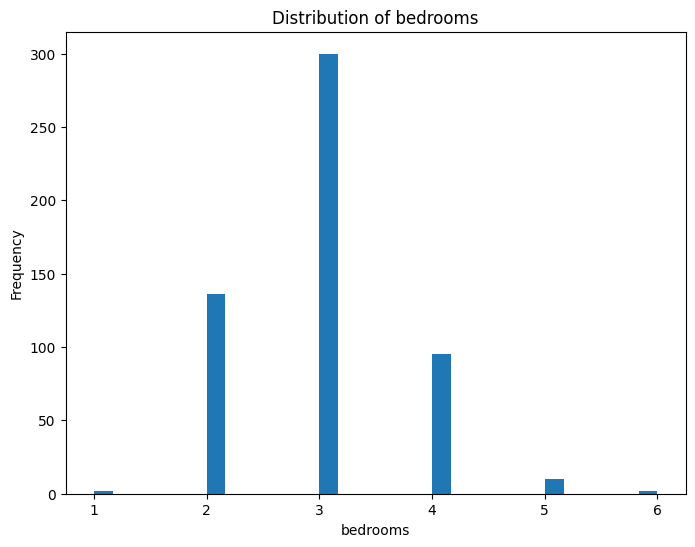

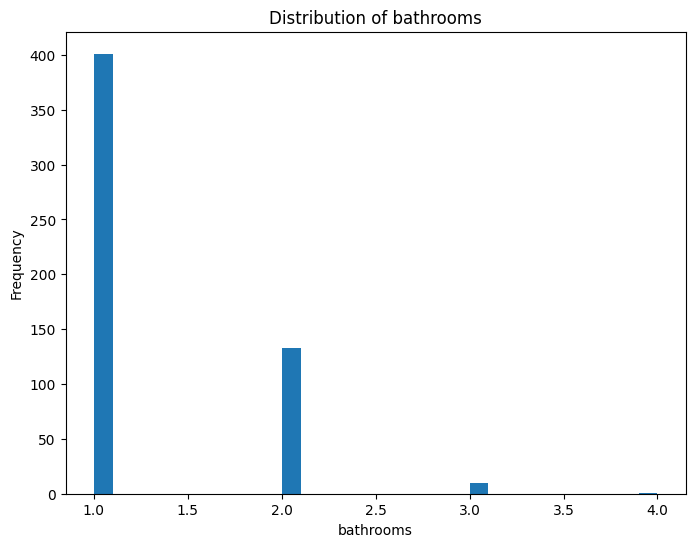

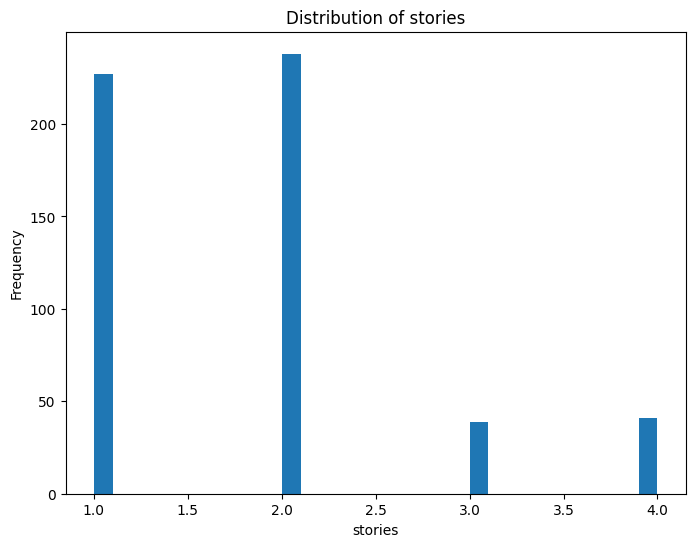

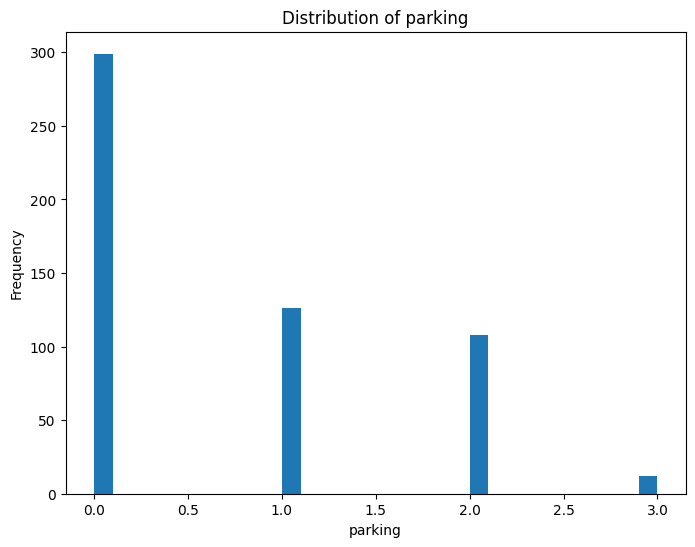

In [10]:
# Analyzing the distribution of numerical features
import matplotlib.pyplot as plt
numerical_features = df.select_dtypes(include=['number']).columns
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    df[col].plot(kind='hist', bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

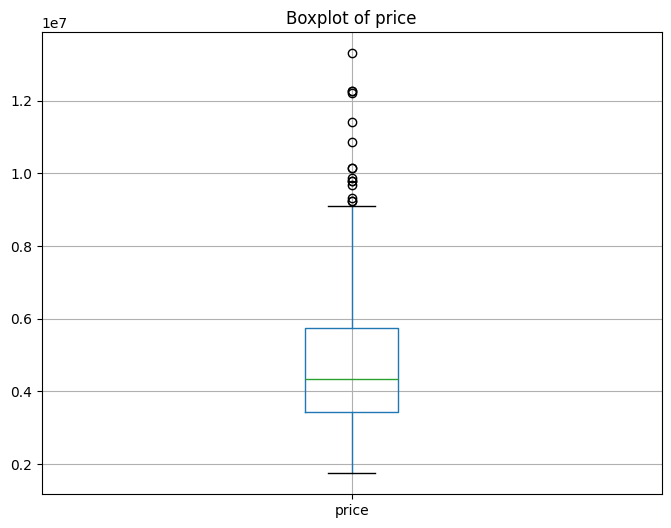

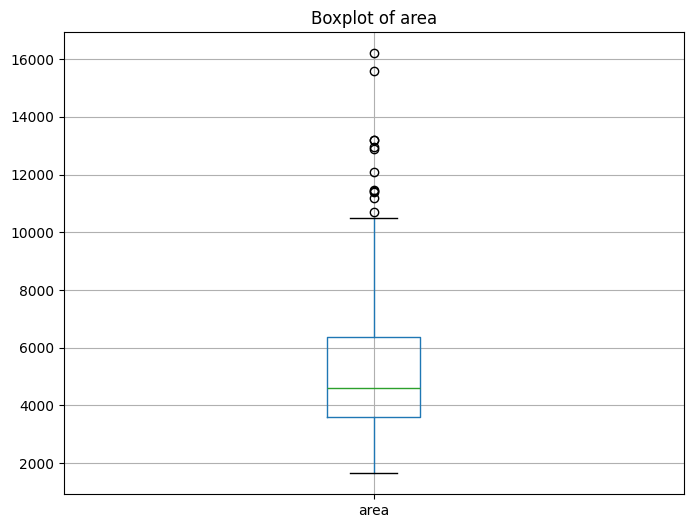

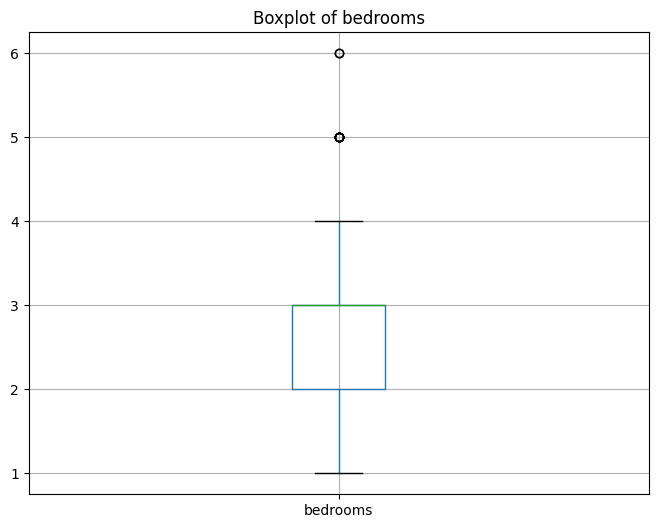

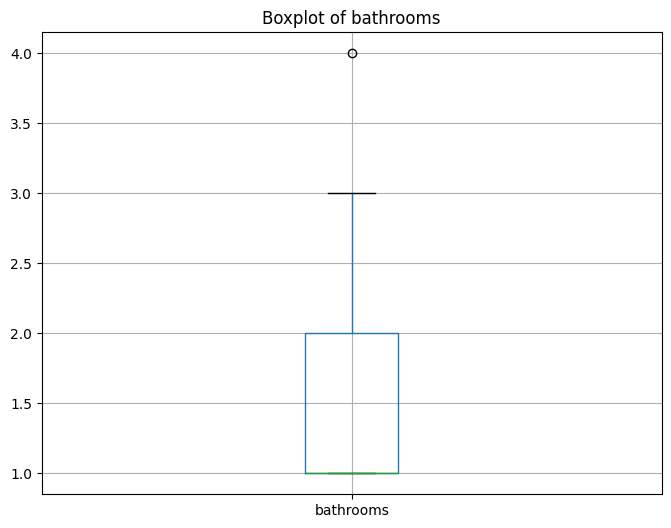

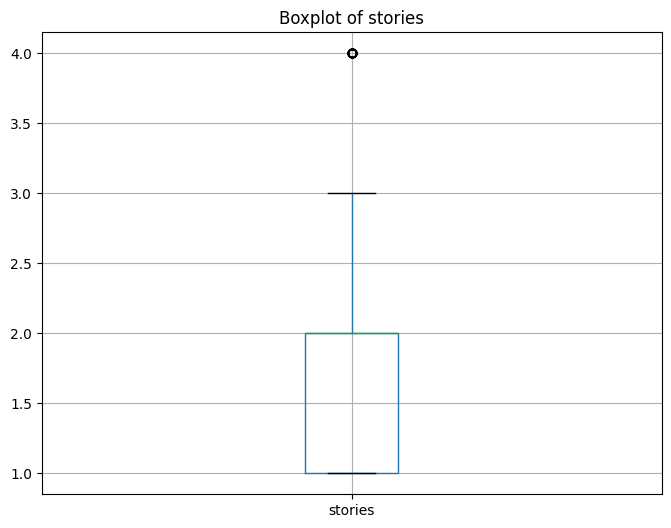

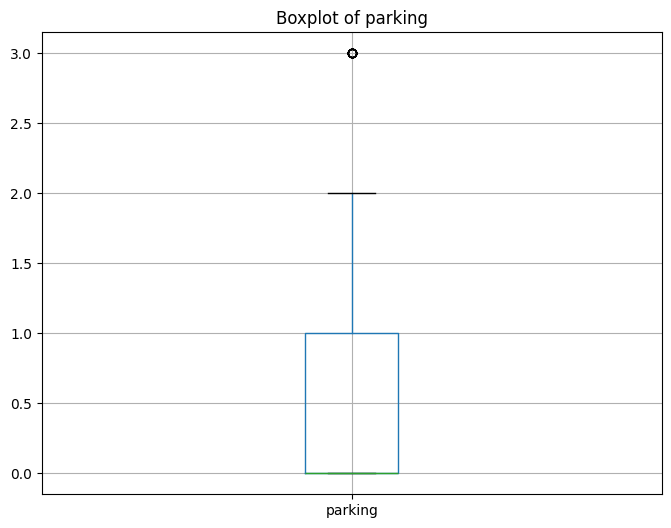

In [11]:
# Identify potential outliers using box plots
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    df.boxplot(column=[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

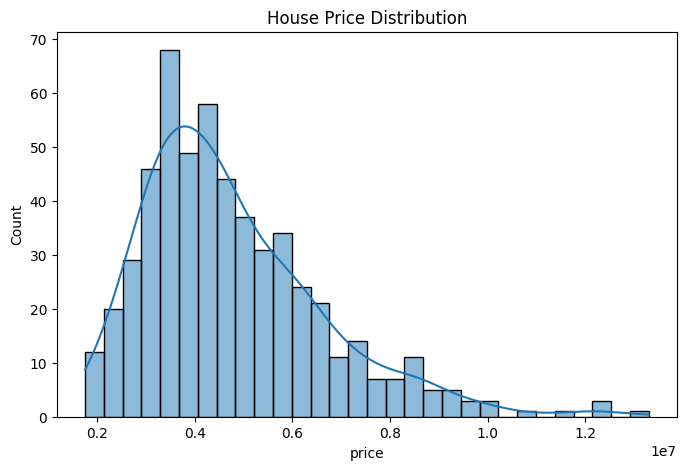

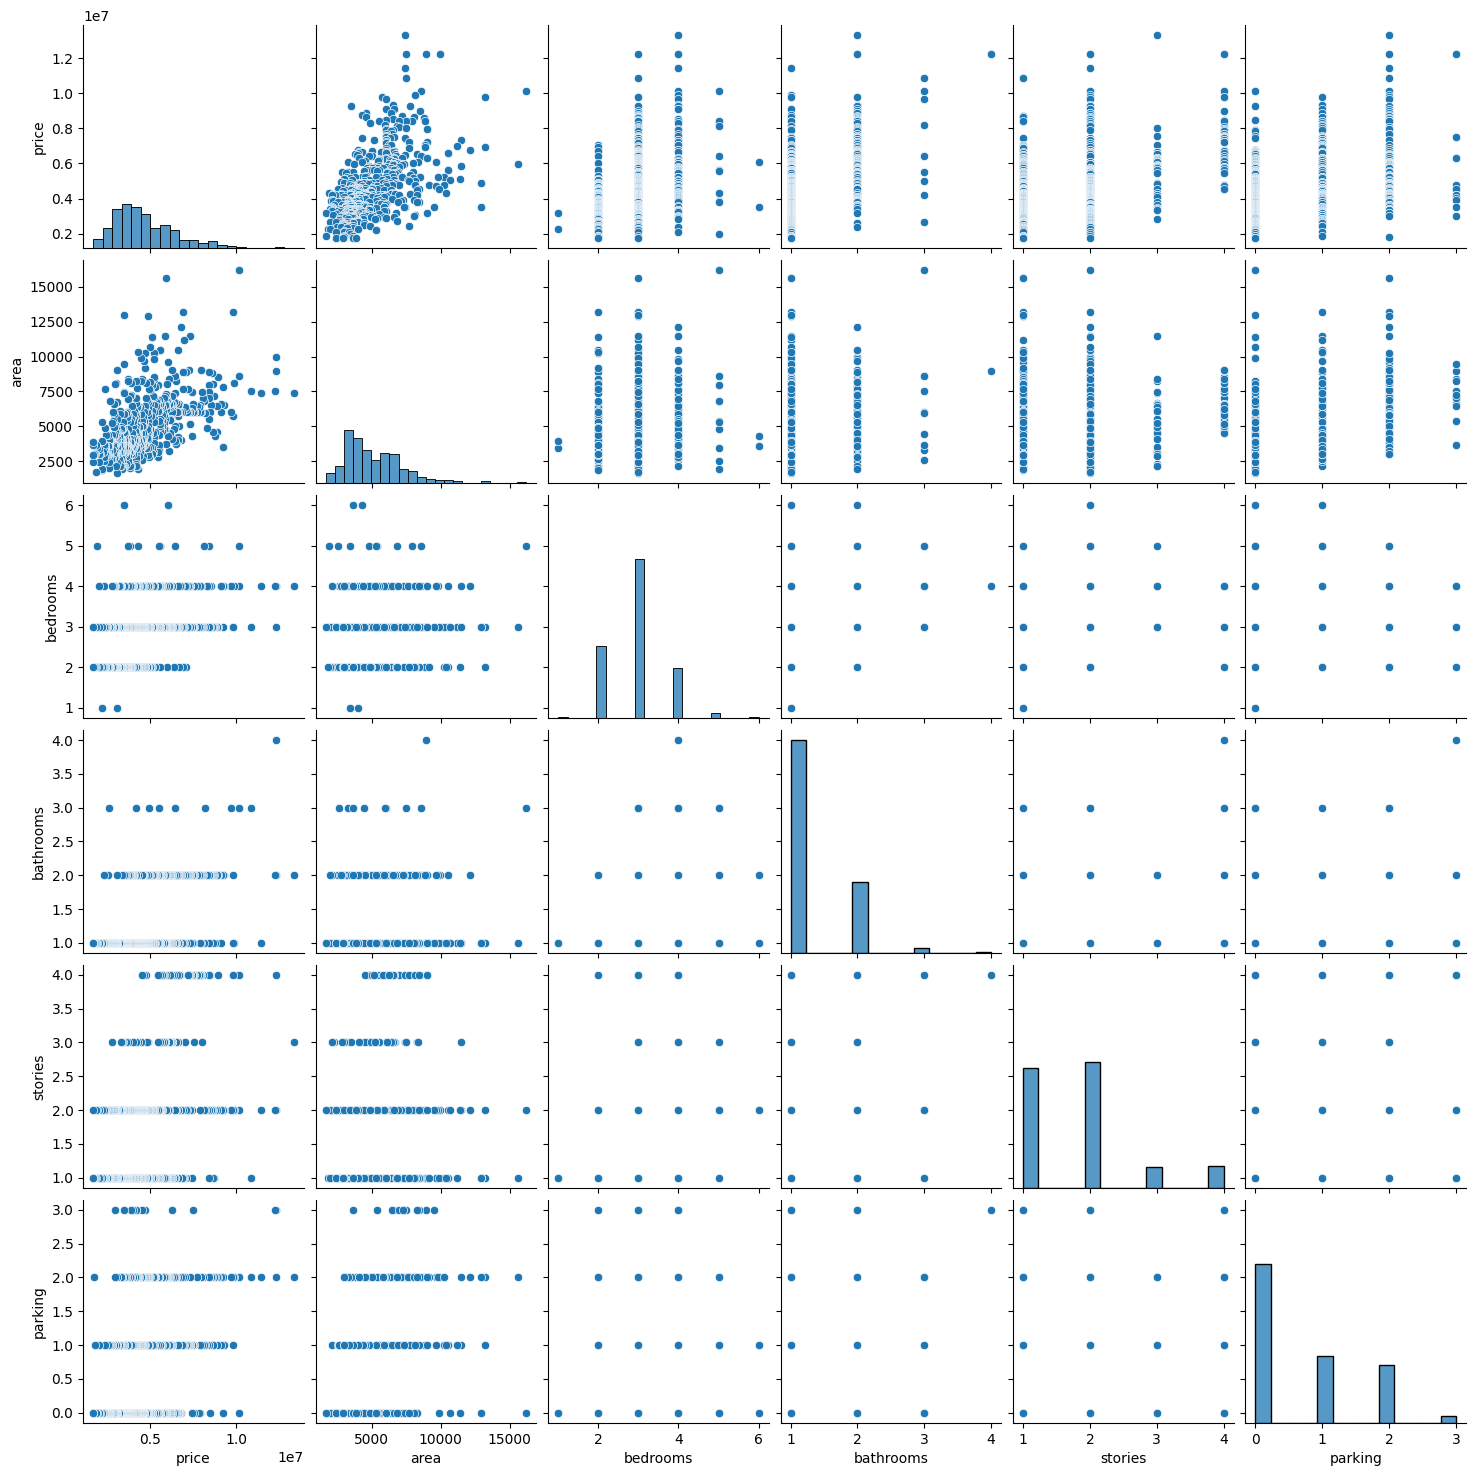

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of house prices
plt.figure(figsize=(8, 5))
sns.histplot(df["price"], bins=30, kde=True)
plt.title("House Price Distribution")
plt.show()

# Pairplot of key features
sns.pairplot(df[["price", "area", "bedrooms", "bathrooms", "stories", "parking"]])
plt.show()

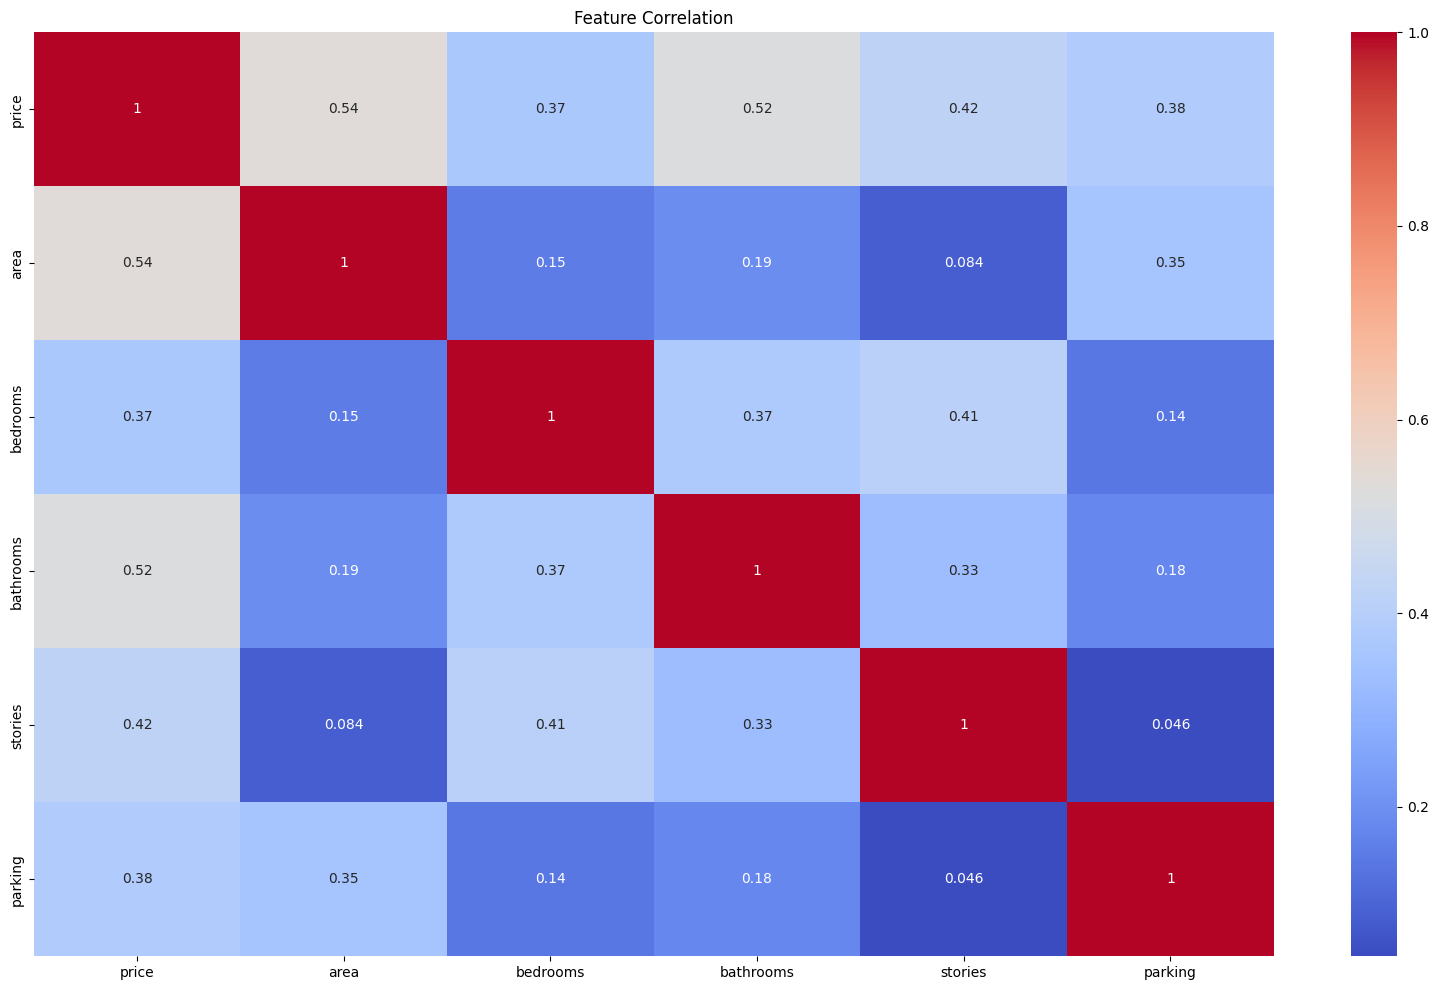

In [14]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

# **3. Dataset Cleaning and Preparation**

In [15]:
# Check for null values
print("Missing values:\n", df.isnull().sum())

# Check for duplicate rows
print("Duplicate rows:", df.duplicated().sum())

# Drop duplicates if any
df = df.drop_duplicates()

Missing values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
Duplicate rows: 0


In [16]:
# Convert categorical columns to lowercase for consistency
df["mainroad"] = df["mainroad"].str.lower()
df["guestroom"] = df["guestroom"].str.lower()
df["basement"] = df["basement"].str.lower()
df["hotwaterheating"] = df["hotwaterheating"].str.lower()
df["airconditioning"] = df["airconditioning"].str.lower()
df["prefarea"] = df["prefarea"].str.lower()
df["furnishingstatus"] = df["furnishingstatus"].str.lower()

In [17]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# **4. Feature Engineering**

Mapping the `furnishingstatus` into two categories only to simplify the further processing and training.

In [18]:
# Map 'semi-furnished' to 'furnished' in the 'furnishingstatus' column
df['furnishingstatus'] = df['furnishingstatus'].replace('semi-furnished', 'furnished')

# Verify the changes
print("Updated furnishingstatus value counts:")
print(df['furnishingstatus'].value_counts())

Updated furnishingstatus value counts:
furnishingstatus
furnished      367
unfurnished    178
Name: count, dtype: int64


In [19]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [20]:
# Encode categorical features
categorical_features = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoders for later use

# Save encoders
import joblib
joblib.dump(label_encoders, "/content/drive/MyDrive/House_Price_predicition/label_encoders.pkl")

['/content/drive/MyDrive/House_Price_predicition/label_encoders.pkl']

# **5. Model Training & Evaluation**

In [22]:
from sklearn.model_selection import train_test_split

# Define features and target variable
features = ["area", "bedrooms", "bathrooms", "stories", "mainroad", "guestroom", "basement", "hotwaterheating", "parking", "airconditioning", "prefarea", "furnishingstatus"]
target = "price"

X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **1. Linear Regression Model**

Training:

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import joblib

# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)

Evaluation:

In [25]:
# Evaluate the Linear Regression model
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)

# Save the Linear Regression model
joblib.dump(linear_model, "/content/drive/MyDrive/House_Price_predicition/house_price_linear_regression_model.pkl")

print("--- Linear Regression Evaluation ---")
print(f"Mean Squared Error (MSE) for Linear Regressio Model:        {mse_linear:.2f}")
print(f"Root Mean Squared Error (RMSE) for Linear Regressio Model:  {rmse_linear:.2f}")
print(f"R-squared (R2) for Linear Regressio Model:                  {r2_linear:.2f}")
print(f"Mean Absolute Error (MAE) for Linear Regressio Model:       {mae_linear:.2f}")

--- Linear Regression Evaluation ---
Mean Squared Error (MSE) for Linear Regressio Model:        1740212290566.02
Root Mean Squared Error (RMSE) for Linear Regressio Model:  1319171.06
R-squared (R2) for Linear Regressio Model:                  0.66
Mean Absolute Error (MAE) for Linear Regressio Model:       958527.17


## **2. Random Forest Regressor**

Training:

In [26]:
from sklearn.ensemble import RandomForestRegressor

# Train model
random_forest_reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_reg_model.fit(X_train, y_train)

# Save model
joblib.dump(random_forest_reg_model, "/content/drive/MyDrive/House_Price_predicition/house_price_random_forest_reg_model.pkl")

['/content/drive/MyDrive/House_Price_predicition/house_price_random_forest_reg_model.pkl']

Evaluation:

In [27]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Make predictions on the test set
y_pred = random_forest_reg_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE) for Random Forest Regressor Model:        {mse:.2f}")
print(f"Root Mean Squared Error (RMSE) for Random Forest Regressor Model:  {rmse:.2f}")
print(f"R-squared (R2) for Random Forest Regressor Model:                  {r2:.2f}")
print(f"Mean Absolute Error (MAE) for Random Forest Regressor Model:       {mae:.2f}")

Mean Squared Error (MSE) for Random Forest Regressor Model:        1978948253475.99
Root Mean Squared Error (RMSE) for Random Forest Regressor Model:  1406750.96
R-squared (R2) for Random Forest Regressor Model:                  0.61
Mean Absolute Error (MAE) for Random Forest Regressor Model:       1028126.81


## **3. Support Vector Regressor (SVR)**

Training:

In [28]:
# Can experiment with different kernels (e.g., 'linear', 'rbf', 'poly') and hyperparameters like C, epsilon, and gamma for better performance.
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1, gamma='scale')
svr_model.fit(X_train, y_train)

print("SVR model training complete.")

# --- Saving the Model ---

# Define the path to save the model
svr_model_path = "/content/drive/MyDrive/House_Price_predicition/house_price_svr_model.pkl"

# Save the trained SVR model
joblib.dump(svr_model, svr_model_path)

print(f"SVR model saved to: {svr_model_path}")

SVR model training complete.
SVR model saved to: /content/drive/MyDrive/House_Price_predicition/house_price_svr_model.pkl


Evaluation:

In [29]:
# Make predictions on the test set
y_pred_svr = svr_model.predict(X_test)

# Evaluate the SVR model
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

print("\n--- Support Vector Regressor (SVR) Evaluation ---")
print(f"Mean Squared Error (MSE):         {mse_svr:.2f}")
print(f"Root Mean Squared Error (RMSE):   {rmse_svr:.2f}")
print(f"R-squared (R2):                   {r2_svr:.2f}")
print(f"Mean Absolute Error (MAE):        {mae_svr:.2f}")


--- Support Vector Regressor (SVR) Evaluation ---
Mean Squared Error (MSE):         5561707302356.51
Root Mean Squared Error (RMSE):   2358327.23
R-squared (R2):                   -0.10
Mean Absolute Error (MAE):        1762560.60


## **4. Gradient Boosting Regressor**

Training:

In [30]:
# Can adjust hyperparameters like n_estimators, learning_rate, max_depth, etc.
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model.fit(X_train, y_train)

print("Gradient Boosting Regressor model training complete.")

# --- Saving the Model ---

# Define the path to save the model
gbr_model_path = "/content/drive/MyDrive/House_Price_predicition/house_price_gbr_model.pkl"

# Save the trained Gradient Boosting Regressor model
joblib.dump(gbr_model, gbr_model_path)

print(f"Gradient Boosting Regressor model saved to: {gbr_model_path}")

Gradient Boosting Regressor model training complete.
Gradient Boosting Regressor model saved to: /content/drive/MyDrive/House_Price_predicition/house_price_gbr_model.pkl


Evaluation:

In [32]:
# Make predictions on the test set
y_pred_gbr = gbr_model.predict(X_test)

# Evaluate the Gradient Boosting Regressor model
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)

print("\n--- Gradient Boosting Regressor Evaluation ---")
print(f"Mean Squared Error (MSE):        {mse_gbr:.2f}")
print(f"Root Mean Squared Error (RMSE):  {rmse_gbr:.2f}")
print(f"R-squared (R2):                  {r2_gbr:.2f}")
print(f"Mean Absolute Error (MAE):       {mae_gbr:.2f}")


--- Gradient Boosting Regressor Evaluation ---
Mean Squared Error (MSE):        1669553063349.78
Root Mean Squared Error (RMSE):  1292111.86
R-squared (R2):                  0.67
Mean Absolute Error (MAE):       961521.47


## **5. K-Nearest Neighbour Regressor**

Training:

In [33]:
knn_model = KNeighborsRegressor(n_neighbors=5) # Using 5 neighbors as a starting point, can change to fine-tune
knn_model.fit(X_train, y_train)

print("K-Nearest Neighbors Regressor model training complete.")

# --- Saving the Model ---

# Define the path to save the model
knn_model_path = "/content/drive/MyDrive/House_Price_predicition/house_price_knn_model.pkl"

# Save the trained K-Nearest Neighbors Regressor model
joblib.dump(knn_model, knn_model_path)

print(f"K-Nearest Neighbors Regressor model saved to: {knn_model_path}")

K-Nearest Neighbors Regressor model training complete.
K-Nearest Neighbors Regressor model saved to: /content/drive/MyDrive/House_Price_predicition/house_price_knn_model.pkl


Evaluation:

In [34]:
# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the K-Nearest Neighbors Regressor model
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

print("\n--- K-Nearest Neighbors Regressor Evaluation ---")
print(f"Mean Squared Error (MSE):         {mse_knn:.2f}")
print(f"Root Mean Squared Error (RMSE):   {rmse_knn:.2f}")
print(f"R-squared (R2):                   {r2_knn:.2f}")
print(f"Mean Absolute Error (MAE):        {mae_knn:.2f}")


--- K-Nearest Neighbors Regressor Evaluation ---
Mean Squared Error (MSE):         3221374817339.45
Root Mean Squared Error (RMSE):   1794818.88
R-squared (R2):                   0.36
Mean Absolute Error (MAE):        1301210.09


# **6. Overall Models Evaluation**

In [35]:
# Collect the metrics for each model
metrics = {
    'Random Forest Regressor': {
        'MSE': mse,       # Use the variable from your Random Forest evaluation
        'RMSE': rmse,     # Use the variable from your Random Forest evaluation
        'R2': r2,         # Use the variable from your Random Forest evaluation
        'MAE': mae        # Use the variable from your Random Forest evaluation
    },
    'Linear Regression': {
        'MSE': mse_linear,    # Use the variable from your Linear Regression evaluation
        'RMSE': rmse_linear,  # Use the variable from your Linear Regression evaluation
        'R2': r2_linear,      # Use the variable from your Linear Regression evaluation
        'MAE': mae_linear     # Use the variable from your Linear Regression evaluation
    },
    'Support Vector Regressor (SVR)': {
        'MSE': mse_svr,   # Use the variable from your SVR evaluation
        'RMSE': rmse_svr, # Use the variable from your SVR evaluation
        'R2': r2_svr,     # Use the variable from your SVR evaluation
        'MAE': mae_svr    # Use the variable from your SVR evaluation
    },
    'Gradient Boosting Regressor': {
        'MSE': mse_gbr,   # Use the variable from your GBR evaluation
        'RMSE': rmse_gbr, # Use the variable from your GBR evaluation
        'R2': r2_gbr,     # Use the variable from your GBR evaluation
        'MAE': mae_gbr    # Use the variable from your GBR evaluation
    },
     'K-Nearest Neighbors Regressor': {
        'MSE': mse_knn,   # Use the variable from your KNN evaluation
        'RMSE': rmse_knn, # Use the variable from your KNN evaluation
        'R2': r2_knn,     # Use the variable from your KNN evaluation
        'MAE': mae_knn    # Use the variable from your KNN evaluation
    }
}

# Create a Pandas DataFrame for the table
metrics_df = pd.DataFrame(metrics).T

# Display the table
print("## Model Comparison Table")
print(metrics_df.to_markdown(floatfmt=".2f")) # Use to_markdown for a neat table format

## Model Comparison Table
|                                |              MSE |       RMSE |    R2 |        MAE |
|:-------------------------------|-----------------:|-----------:|------:|-----------:|
| Random Forest Regressor        | 1978948253475.99 | 1406750.96 |  0.61 | 1028126.81 |
| Linear Regression              | 1740212290566.02 | 1319171.06 |  0.66 |  958527.17 |
| Support Vector Regressor (SVR) | 5561707302356.51 | 2358327.23 | -0.10 | 1762560.60 |
| Gradient Boosting Regressor    | 1669553063349.78 | 1292111.86 |  0.67 |  961521.47 |
| K-Nearest Neighbors Regressor  | 3221374817339.45 | 1794818.88 |  0.36 | 1301210.09 |


## **Bar-Chart Comparison:**

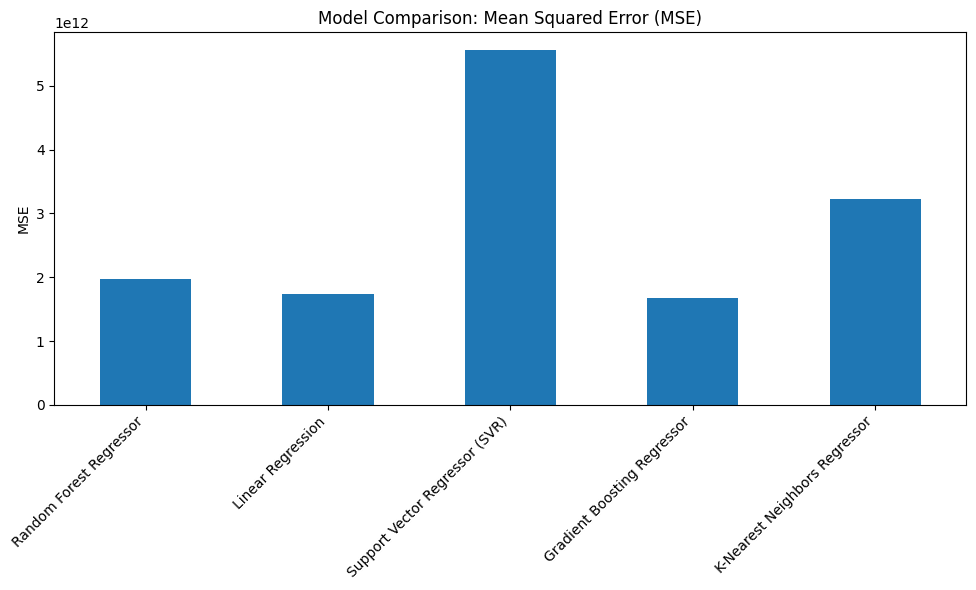

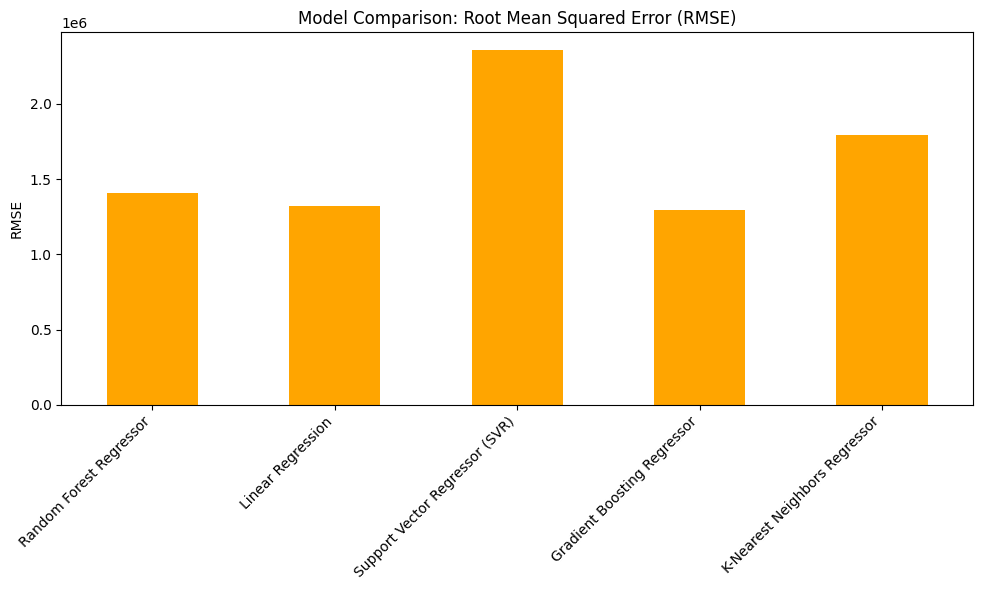

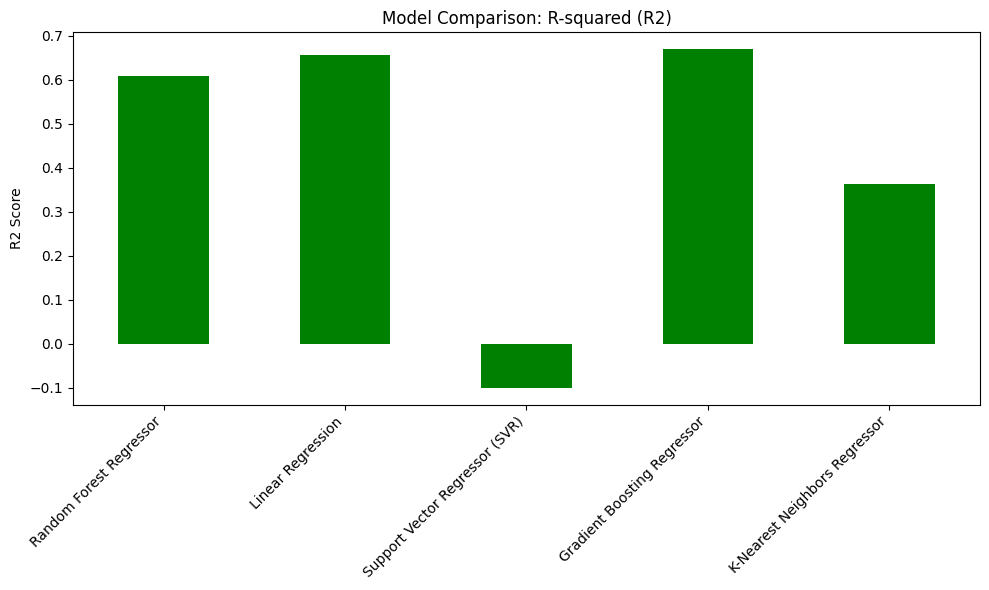

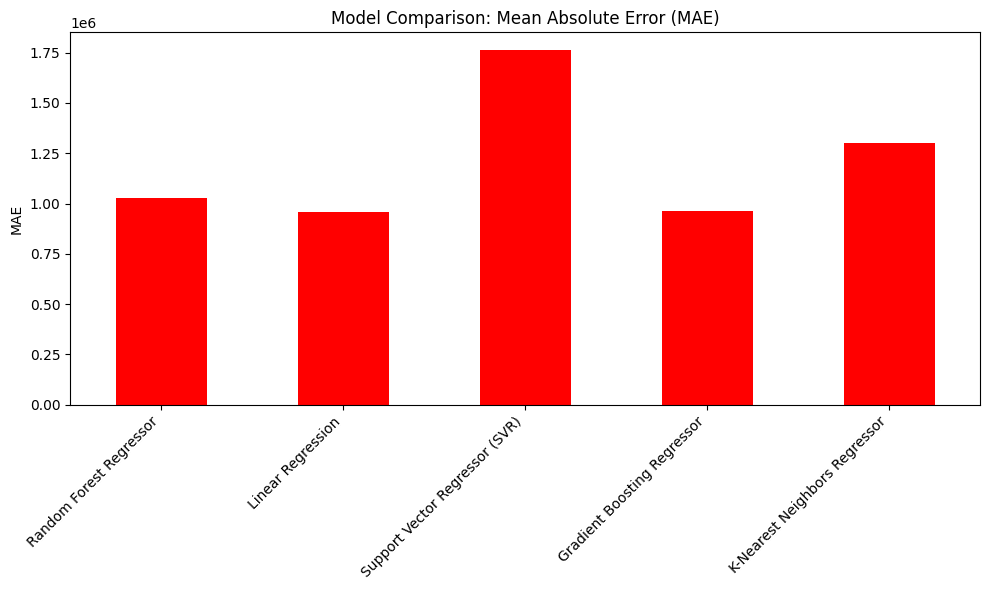

In [36]:
# MSE Comparison
metrics_df['MSE'].plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison: Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# RMSE Comparison
metrics_df['RMSE'].plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Model Comparison: Root Mean Squared Error (RMSE)')
plt.ylabel('RMSE')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# R2 Comparison
metrics_df['R2'].plot(kind='bar', figsize=(10, 6), color='green')
plt.title('Model Comparison: R-squared (R2)')
plt.ylabel('R2 Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# MAE Comparison
metrics_df['MAE'].plot(kind='bar', figsize=(10, 6), color='red')
plt.title('Model Comparison: Mean Absolute Error (MAE)')
plt.ylabel('MAE')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **7. Conclusion**

The `Gradient Boosting Regressor` appears to be the best performing model.

Explanation:

* Lowest `MSE` and `RMSE`: It has the lowest `Mean Squared Error (MSE)` (**1669553063349.78**) and the lowest `Root Mean Squared Error (RMSE)` (**1292111.86**). Lower values for these metrics indicate that the model's predictions have the smallest average squared difference and average difference from the actual prices.

* Highest `R2`: It has the highest `R-squared (R2)` value (**0.67**). A higher `R2` means that the model explains the largest proportion of the variance in house prices compared to the other models.

* Competitive `MAE`: Its `Mean Absolute Error (MAE)` (**961521.47**) is very close to the lowest `MAE` achieved by the `Linear Regression model`. While `Linear Regression` has a slightly lower `MAE`, the `Gradient Boosting Regressor`'s superior performance in terms of `MSE`, `RMSE`, and `R2` suggests it is a better overall fit for this data and provides more accurate predictions on average.

* The `Support Vector Regressor (SVR)` is performing particularly poorly, as indicated by its high error metrics and negative `R2 score` (a negative `R2` suggests the model is performing worse than simply predicting the mean of the target variable).


                              ---- The Models' Implementations and Evaluations have been ended here ----

# **7. Application Implemention using FastAPI**

## **Creating an HTML file: 'index.html' for the frontend of the application:**

Note: this can be further beautified

In [1]:
html_code = """
<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8" />
  <meta name="viewport" content="width=device-width, initial-scale=1.0" />
  <title>House Price Predictor</title>
  <style>
    body {
      font-family: "Segoe UI", Tahoma, Geneva, Verdana, sans-serif;
      background: #f4f7f8;
      margin: 0;
      padding: 0;
      display: flex;
      justify-content: center;
      align-items: flex-start;
      min-height: 100vh;
    }

    .container {
      background: #ffffff;
      margin-top: 60px;
      padding: 40px;
      border-radius: 12px;
      box-shadow: 0 8px 20px rgba(0, 0, 0, 0.1);
      max-width: 500px;
      width: 100%;
    }

    h2 {
      text-align: center;
      color: #333;
      margin-bottom: 30px;
    }

    label {
      display: block;
      margin-bottom: 6px;
      font-weight: 500;
      color: #444;
    }

    input, select {
      width: 100%;
      padding: 10px;
      margin-bottom: 20px;
      border-radius: 8px;
      border: 1px solid #ccc;
      font-size: 15px;
    }

    button {
      width: 100%;
      padding: 12px;
      background-color: #3a86ff;
      color: white;
      font-size: 16px;
      border: none;
      border-radius: 8px;
      cursor: pointer;
      transition: background 0.3s;
    }

    button:hover {
      background-color: #265cc5;
    }

    #result {
      margin-top: 30px;
      padding: 20px;
      text-align: center;
      background-color: #e0ffe0;
      border: 2px solid #38b000;
      border-radius: 10px;
      font-size: 22px;
      font-weight: bold;
      color: #1b5e20;
      box-shadow: 0 4px 10px rgba(0, 128, 0, 0.1);
    }

    @media (max-width: 600px) {
      .container {
        margin: 20px;
        padding: 20px;
      }
    }
  </style>
</head>
<body>
  <div class="container">
    <h2>🏡 House Price Predictor</h2>
    <form id="predictForm">
      <label for="area">Area (sq ft)</label>
      <small>Please select area between 500 sq. ft. to 20,000 sq. ft.</small>
      <input type="number" id="area" min="500" max="20000" required />

      <label for="bedrooms">Bedrooms</label>
      <small>Please select between 1 to 10 bedrooms</small>
      <input type="number" id="bedrooms" min="1" max="10" required />

      <label for="bathrooms">Bathrooms</label>
      <small>Please select between 1 to 5 bathrooms</small>
      <input type="number" id="bathrooms" min="1" max="5" required />

      <label for="stories">Stories</label>
      <small>Please select between 1 to 5 stories</small>
      <input type="number" id="stories" min="1" max="5" required />

      <label for="parking">Parking Spaces</label>
      <small>Please select between 1 to 5 parking spaces</small>
      <input type="number" id="parking" min="1" max="5" required />


      <label for="mainroad">Main Road</label>
      <select id="mainroad">
        <option value="yes">Yes</option>
        <option value="no">No</option>
      </select>

      <label for="guestroom">Guest Room</label>
      <select id="guestroom">
        <option value="yes">Yes</option>
        <option value="no">No</option>
      </select>

      <label for="basement">Basement</label>
      <select id="basement">
        <option value="yes">Yes</option>
        <option value="no">No</option>
      </select>

      <label for="hotwaterheating">Hot Water Heating</label>
      <select id="hotwaterheating">
        <option value="yes">Yes</option>
        <option value="no">No</option>
      </select>

      <label for="airconditioning">Air Conditioning</label>
      <select id="airconditioning">
        <option value="yes">Yes</option>
        <option value="no">No</option>
      </select>

      <label for="prefarea">Preferred Area</label>
      <select id="prefarea">
        <option value="yes">Yes</option>
        <option value="no">No</option>
      </select>

      <label for="furnishingstatus">Furnishing Status</label>
      <select id="furnishingstatus">
        <option value="yes">Yes</option>
        <option value="no">No</option>
      </select>

      <button type="submit">Predict Price</button>
    </form>

    <div id="result" class="prediction-box hidden"></div>
  </div>

  <script src="index.js"></script>
</body>
</html>
"""

with open("/content/index.html", "w") as f:
    f.write(html_code)

## **Creating the JavaScript file 'index.js' as an Entry-point:**

In [2]:
js_code = """
document.getElementById('predictForm').addEventListener('submit', async function (e) {
    e.preventDefault();

    const data = {
        area: parseFloat(document.getElementById('area').value),
        bedrooms: parseInt(document.getElementById('bedrooms').value),
        bathrooms: parseFloat(document.getElementById('bathrooms').value),
        stories: parseInt(document.getElementById('stories').value),
        parking: parseInt(document.getElementById('parking').value),
        mainroad: document.getElementById('mainroad').value,
        guestroom: document.getElementById('guestroom').value,
        basement: document.getElementById('basement').value,
        hotwaterheating: document.getElementById('hotwaterheating').value,
        airconditioning: document.getElementById('airconditioning').value,
        prefarea: document.getElementById('prefarea').value,
        furnishingstatus: document.getElementById('furnishingstatus').value

    };

    console.log("Sending data:", data);

    try {
        const response = await fetch('/predict', {
            method: 'POST',
            headers: {
                'Content-Type': 'application/json'
            },
            body: JSON.stringify(data)
        });

        const result = await response.json();
        document.getElementById('result').innerText = `Predicted Price: PKR ${result.predicted_price}`;
    } catch (err) {
        document.getElementById('result').innerText = 'Error predicting price';
        console.error("Error:", err);
    }
});
"""

with open("/content/index.js", "w") as f:
    f.write(js_code)

### **IMPORTANT NOTE:** Run the below cell to ensure that the port 8000 is not already in use, this code section will vacant the port 8000 to use.

In [3]:
!fuser -k 8000/tcp

## **Finally creating an Application using FastAPI:**

In [4]:
import threading
import uvicorn
from fastapi import FastAPI
from fastapi.responses import FileResponse
from pydantic import BaseModel
import nest_asyncio
import pickle
import numpy as np
import subprocess
import joblib

app = FastAPI()

# Loading the best performing model: Gradient Boosting Regressor
with open("/content/drive/MyDrive/House_Price_predicition/house_price_gbr_model.pkl", "rb") as f:
    model = joblib.load(f)

class HouseData(BaseModel):
    area: float
    bedrooms: int
    bathrooms: float
    stories: int
    parking: int
    mainroad: str
    guestroom: str
    basement: str
    hotwaterheating: str
    airconditioning: str
    prefarea: str
    furnishingstatus: str

@app.get("/")
def root():
    return FileResponse("index.html")

@app.get("/index.js")
def js_file():
    return FileResponse("index.js")

@app.post("/predict")
def predict(data: HouseData):
    print("Received prediction request with data:", data) # Add this line
    binary_map = {'yes': 1, 'no': 0}

    try: # Add a try-except block to catch potential errors during prediction
        input_data = np.array([
            data.area, data.bedrooms, data.bathrooms, data.stories, data.parking,
            binary_map[data.mainroad], binary_map[data.guestroom],
            binary_map[data.basement], binary_map[data.hotwaterheating],
            binary_map[data.airconditioning], binary_map[data.prefarea],
            binary_map[data.furnishingstatus]
        ]).reshape(1, -1)

        pred = model.predict(input_data)[0]
        print("Prediction successful:", pred)
        return {"predicted_price": round(pred, 2)}

    except Exception as e:
        print("Error during prediction:", e)
        raise HTTPException(status_code=500, detail=f"Prediction failed: {e}") # Return a detailed error

# Run FastAPI
nest_asyncio.apply()

# Renamed function to match the variable name used in the thread
def run_api():
    uvicorn.run(app, host="0.0.0.0", port=8000)

# Function to start LocalTunnel with correct path
def run_localtunnel():
    # Added explicit path for localtunnel executable, often located in /usr/local/bin
    subprocess.run(["/usr/local/bin/lt", "--port", "8000", "--subdomain", "new-house-price-api"])


# Run FastAPI and LocalTunnel in parallel
# Changed target to the correctly named function run_api
threading.Thread(target=run_api).start()
threading.Thread(target=run_localtunnel).start()

### **IMPORTANT NOTE:** Run the below cell to get the IP (Password) which will be required to access your application while running via localtunnel

In [5]:
!wget -q -O - https://loca.lt/mytunnelpassword

34.134.35.166

### **Finally run the below cell and follow the provided HTTPS link, use the above IP ADDRESS as password and Enjoy using your App!**

In [9]:
!lt --port 8000

your url is: https://violet-drinks-chew.loca.lt
INFO:     147.161.160.166:0 - "GET / HTTP/1.1" 200 OK
INFO:     147.161.160.166:0 - "GET /index.js HTTP/1.1" 200 OK
INFO:     147.161.160.166:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
Received prediction request with data: area=3800.0 bedrooms=2 bathrooms=2.0 stories=2 parking=2 mainroad='yes' guestroom='yes' basement='yes' hotwaterheating='yes' airconditioning='yes' prefarea='yes' furnishingstatus='yes'
Prediction successful: 5583774.868681884
INFO:     147.161.160.166:0 - "POST /predict HTTP/1.1" 200 OK


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


Received prediction request with data: area=5000.0 bedrooms=2 bathrooms=2.0 stories=2 parking=2 mainroad='yes' guestroom='yes' basement='yes' hotwaterheating='yes' airconditioning='yes' prefarea='yes' furnishingstatus='yes'
Prediction successful: 6654138.40219945
INFO:     147.161.160.166:0 - "POST /predict HTTP/1.1" 200 OK


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


^C


### **In order to check the Prediction API, use the below cell.**

In [8]:
import requests

url = "http://localhost:8000/predict"  # Use LocalTunnel OR Cloudflare URL
data = {
    "area": 3800, "bedrooms": 3, "bathrooms": 2.0, "stories": 2, "parking": 1,
    "mainroad": "yes", "guestroom": "no", "basement": "no",
    "hotwaterheating": "no", "airconditioning": "yes", "prefarea": "yes", "furnishingstatus": "no"
}

response = requests.post(url, json=data)
response.raise_for_status()  # Raise HTTPError for bad responses (4xx or 5xx)
print(response.json())

Received prediction request with data: area=3800.0 bedrooms=3 bathrooms=2.0 stories=2 parking=1 mainroad='yes' guestroom='no' basement='no' hotwaterheating='no' airconditioning='yes' prefarea='yes' furnishingstatus='no'
Prediction successful: 5611892.831926007
INFO:     127.0.0.1:51538 - "POST /predict HTTP/1.1" 200 OK
{'predicted_price': 5611892.83}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
